In [222]:
include("systems.jl")
include("iterative_methods.jl")
include("lineal_regressions.jl")

using Plots
using DataFrames

# 1A 
![Punto 1.A](./images/1a.png)

## 1A.1

In [180]:
A = Float64.([2 -6 -1; -3 -1 7; -8 1 -2])
b = vec(Float64.([-38 -34 -20]))

exact_solution = inv(A)*b
print("Exact solution: ", exact_solution)

Exact solution: [4.0, 8.0, -1.9999999999999996]

***Eliminación gaussiana***:

In [181]:
mat, v, x = direct_matrix_solution(A, b, type = "gaussian_elimination")

println("Reduced matrix: \n", mat)
println("Reduced vector: \n", v)
println("Solution: \n", x)

Reduced matrix: 
[2.0 -6.0 -1.0; 0.0 -10.0 5.5; 0.0 0.0 -18.65]
Reduced vector: 
[-38.0, -91.0, 37.29999999999998]
Solution: 
[4.0; 8.0; -1.9999999999999993;;]


***Eliminación gaussiana con pivoteo parcial:***

In [182]:
mat, v, x = direct_matrix_solution(A, b, type = "partial_pivoting")

println("Reduced matrix: \n", mat)
println("Reduced vector: \n", v)
println("Solution: \n", x)

Reduced matrix: 
[-8.0 1.0 -2.0; 0.0 -1.375 7.75; 0.0 0.0 -33.90909090909091]
Reduced vector: 
[-20.0, -26.5, 67.81818181818181]
Solution: 
[4.0; 8.0; -2.0;;]


***Eliminación gaussiana con pivoteo parcial y escalamiento:*** 

In [183]:
mat, v, x = direct_matrix_solution(A, b, type = "scaled_partial_pivoting")

println("Reduced matrix: \n", mat)
println("Reduced vector: \n", v)
println("Solution: \n", x)

scaling_factors = [6.0; 7.0; 8.0;;]
Reduced matrix: 
[-8.0 1.0 -2.0; 0.0 -1.375 7.75; 0.0 0.0 -33.90909090909091]
Reduced vector: 
[-20.0, -26.5, 67.81818181818181]
Solution: 
[4.0; 8.0; -2.0;;]


## 1A.2

In [184]:
A = Float64.([0 -3 7; 1 2 -1; 5 -2 0])
b = vec(Float64.([2 3 2]))

exact_solution = inv(A)*b
print("Exact solution: ", exact_solution)

Exact solution: [0.9855072463768118, 1.463768115942029, 0.9130434782608695]

***Eliminación gaussiana***:

In [185]:
mat, v, x = direct_matrix_solution(A, b, type = "gaussian_elimination")

println("Reduced matrix: \n", mat)
println("Reduced vector: \n", v)
println("Solution: \n", x)

Reduced matrix: 
[0.0 -3.0 7.0; NaN Inf -Inf; NaN NaN NaN]
Reduced vector: 
[2.0, -Inf, NaN]
Solution: 
[NaN; NaN; NaN;;]


***Eliminación gaussiana con pivoteo parcial:***

In [186]:
mat, v, x = direct_matrix_solution(A, b, type = "partial_pivoting")

println("Reduced matrix: \n", mat)
println("Reduced vector: \n", v)
println("Solution: \n", x)

Reduced matrix: 
[5.0 -2.0 0.0; 0.0 2.4 -1.0; 0.0 0.0 5.75]
Reduced vector: 
[2.0, 2.6, 5.25]
Solution: 
[0.9855072463768118; 1.463768115942029; 0.9130434782608695;;]


***Eliminación gaussiana con pivoteo parcial y escalamiento:***

In [187]:
mat, v, x = direct_matrix_solution(A, b, type = "scaled_partial_pivoting")

println("Reduced matrix: \n", mat)
println("Reduced vector: \n", v)
println("Solution: \n", x)

scaling_factors = [7.0; 2.0; 5.0;;]
Reduced matrix: 
[0.0 2.4 -1.0; 5.0 -2.0 0.0; -7.5 0.0 7.0]
Reduced vector: 
[2.6, 2.0, -1.0]
Solution: 
[Inf; -1.0; -0.14285714285714285;;]


### Conclusiones:

Conclusiones del punto 1A (1A.1 y 1A.2)

# 1B
![Punto 1.B](images/1b.png)

In [188]:
A = Float64.([3 -0.1 -0.2; 0.1 7 -0.3; 0.3 -0.2 10])
b = vec(Float64.([7.85 -19.3 71.4]))

3-element Vector{Float64}:
   7.85
 -19.3
  71.4

In [189]:
L, U = LU(A)
println("A: \n", L*U)
println("L: \n", L)
println("U: \n", U)

A: 
[3.0 -0.1 -0.2; 0.1 6.996666666666667 -0.30666666666666664; 0.3 -0.21000000000000002 9.98857142857143]
L: 
[1.0 0.0 0.0; 0.03333333333333333 1.0 0.0; 0.09999999999999999 -0.028571428571428574 1.0]
U: 
[3.0 -0.1 -0.2; 0.0 7.0 -0.3; 0.0 0.0 10.0]


In [190]:
# solution
L,U = LU(A)
y = solution(L,b)
x = solution(U,y)
println("Solution: \n", x)

Solution: 
[2.6166666666666667, -2.7945238095238096, 7.005609523809525]


# 2A

![Punto 2A](./images/2a.png)

In [191]:
A = [15 -3 -1; -3 18 -6; -4 -1 12]
b = vec([3800 1200 2350])
x = vec([0 0 0])
tol = 0.01

ans1 = jacobi(A, b, x, tol, is_absolute = false)

3-element Vector{Float64}:
 319.49652777777777
 226.0926783264746
 320.5977794924554

In [192]:
A = [15 -3 -1; -3 18 -6; -4 -1 12]
b = vec([3800 1200 2350])
x = vec([0 0 0])
tol = 0.01

ans2 = gauss_siedel(A, b, x, tol, is_absolute = false)

3-element Vector{Float64}:
 319.32535718746294
 226.54018661320117
 321.15346794692107

# 2B
![Punto 2B](./images/2b.png)

In [219]:
A = [2 -6 -1; -3 -1 7; -8 1 -2]
b = vec([-38 -34 -20])
x = vec([0 0 0])

tol         = 0.001
norm_type   = "infinite"
is_absolute = false

false

#### 2B.1

In [223]:
ans3 = jacobi(A, b, x, tol, is_absolute = is_absolute, norm = norm_type)

The method did not converge in the given range of max iterations

3-element Vector{Float64}:
 NaN
 NaN
 NaN

In [224]:
ans4 = gauss_siedel(A, b, x, tol, is_absolute = is_absolute, norm = norm_type)

The method did not converge in the given range of max iterations

3-element Vector{Float64}:
 NaN
 NaN
 NaN

#### 2B.2

In [216]:
A = [0 -3 7; 1 2 -1; 5 -2 0]
b = vec([2 3 2])
x = vec([0 0 0])

tol         = 0.001
norm_type   = "infinite"
is_absolute = false

false

In [225]:
ans5 = jacobi(A, b, x, tol, is_absolute = is_absolute, norm = norm_type)

The method did not converge in the given range of max iterations

3-element Vector{Float64}:
 NaN
 NaN
 NaN

In [226]:
ans6 = gauss_siedel(A, b, x, tol, is_absolute = is_absolute, norm = norm_type)

The method did not converge in the given range of max iterations

3-element Vector{Float64}:
 NaN
 NaN
 NaN

# 2C
![Punto 2C](./images/2c.png)

# 3A

![3a](./images/3a.png)

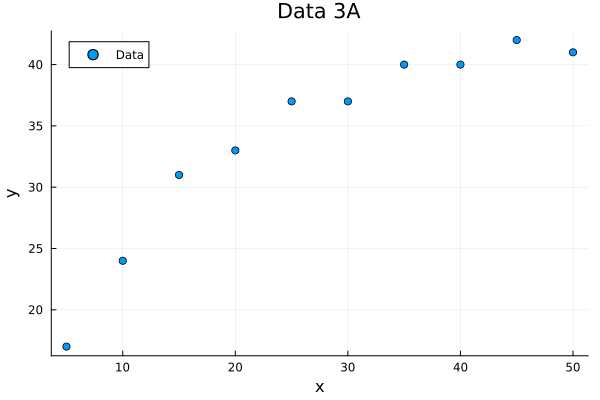

In [200]:
start = 5
end_ = 50
x = vec(range(start = start, stop = end_, step = 5))
y = vec([17 24 31 33 37 37 40 40 42 41])
points = [(x[i], y[i]) for i in 1:length(x)]

scatter(x, y, label = "Data", xlabel = "x", ylabel = "y", title = "Data 3A")

## 3A.1

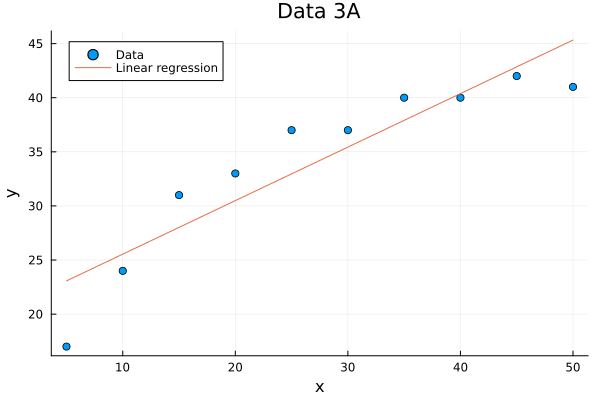

In [201]:
a0, a1 = linear_regression(points)
lin_fn = build_lin_fn(a0, a1)

scatter(x, y, label = "Data", xlabel = "x", ylabel = "y", title = "Data 3A")
plot!(lin_fn, start, end_, label = "Linear regression")

## 3A.2

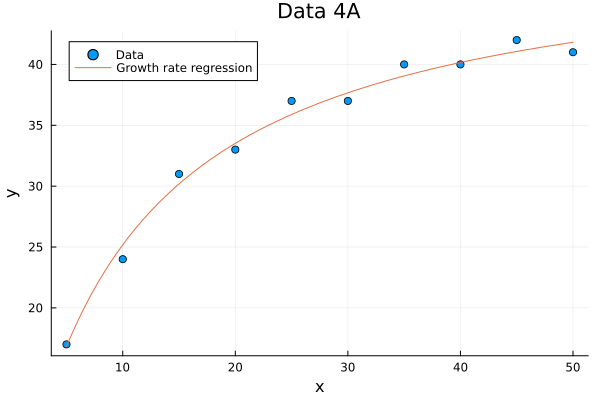

In [202]:
a0, a1 = growth_rate_regression(points)
growth_rate_fn = build_growth_rate_fn(a0, a1)

scatter(x, y, label = "Data", xlabel = "x", ylabel = "y", title = "Data 4A")
plot!(growth_rate_fn, start, end_, label = "Growth rate regression")

## 3A.3

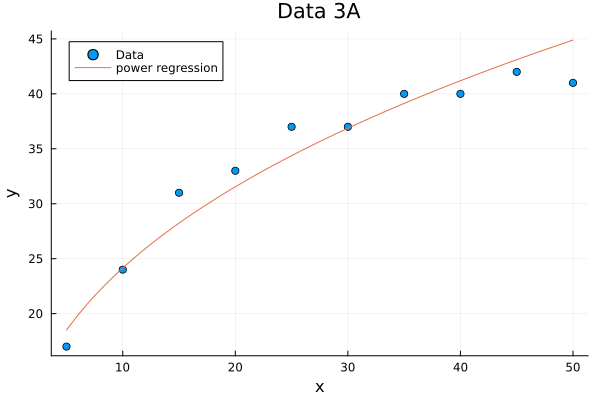

In [203]:
a0, a1 = power_regression(points)
pow_fn = build_pow_fn(a0, a1)

scatter(x, y, label = "Data", xlabel = "x", ylabel = "y", title = "Data 3A")
plot!(pow_fn, start, end_, label = "power regression")

## 3A.4

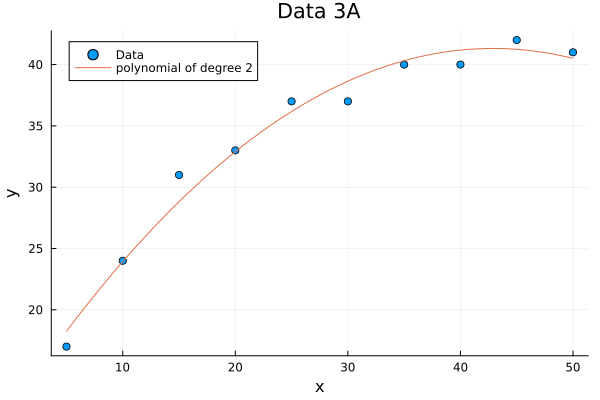

In [204]:
degree = 3
a = polynomial_regression(points, degree)
quad_fn = build_poly_fn(a)

scatter(x, y, label = "Data", xlabel = "x", ylabel = "y", title = "Data 3A")
plot!(quad_fn, start, end_, label = "polynomial of degree $(degree-1)")


## 3A.5

In [205]:
generated_points = [y, lin_fn.(x), growth_rate_fn.(x),  pow_fn.(x), quad_fn.(x)]

df = DataFrame(generated_points, [:x, :linear, :growth_rate, :power, :polynomial])
df

Row,x,linear,growth_rate,power,polynomial
,Float64,Float64,Float64,Float64,Float64
1,17.0,23.0727,16.8192,18.4973,18.2545
2,24.0,25.5455,25.1828,24.1561,23.9394
3,31.0,28.0182,30.1864,28.2381,28.8212
4,33.0,30.4909,33.5161,31.5462,32.9
5,37.0,32.9636,35.8915,34.3768,36.1758
6,37.0,35.4364,37.6714,36.877,38.6485
7,40.0,37.9091,39.0548,39.1323,40.3182
8,40.0,40.3818,40.1609,41.1971,41.1848
9,42.0,42.8545,41.0656,43.1087,41.2485


## 3A.6

Para saber cuál es mejor usaremos el standard estimation error generado por cada método

In [206]:
funcs = [lin_fn, growth_rate_fn, pow_fn, quad_fn]
standard_errors = [standard_stimation_error(points, func) for func in funcs]

df = DataFrame(linear      = [standard_errors[1]],
               growth_rate = [standard_errors[2]],
               power       = [standard_errors[3]],
               polynomial  = [standard_errors[4]]) 

Row,linear,growth_rate,power,polynomial
,Float64,Float64,Float64,Float64
1,3.48503,0.901602,2.16448,1.22691


El ajuste superior para los datos fue el de un modelo de regresión por tasa de crecimiento, esto observando los niveles de error generados por cada modelo de regresion.

# 3B

![3b](./images/3b.png)

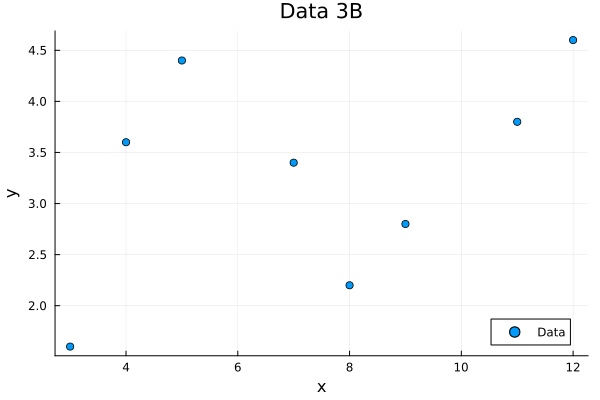

In [207]:
x = vec([3 4 5 7 8 9 11 12])
y = vec([1.6 3.6 4.4 3.4 2.2 2.8 3.8 4.6])
points = [(x[i], y[i]) for i in 1:length(x)]

start = x[1]
end_ = x[end]

scatter(x, y, label = "Data", xlabel = "x", ylabel = "y", title = "Data 3B")

## 3B.1

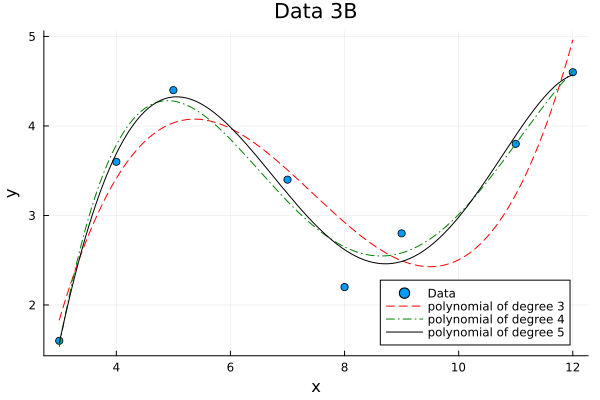

In [208]:
degree = 4

fn_degree3 = build_poly_fn(polynomial_regression(points, degree))
fn_degree4 = build_poly_fn(polynomial_regression(points, degree + 1))
fn_degree5 = build_poly_fn(polynomial_regression(points, degree + 2))

scatter(x, y, label = "Data", xlabel = "x", ylabel = "y", title = "Data 3B")
plot!(fn_degree3, start, end_, label = "polynomial of degree $(degree-1)",  color = :red,   linestyle = :dash,)
plot!(fn_degree4, start, end_, label = "polynomial of degree $(degree)",    color = :green, linestyle = :dashdot,)
plot!(fn_degree5, start, end_, label = "polynomial of degree $(degree+1)",  color = :black)

## 3B.2

## 3B.3

## 3B.4